In [1]:
!pip install tensorflow as tf

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [7]:
(xtrain, ytrain), _ = tf.keras.datasets.mnist.load_data()

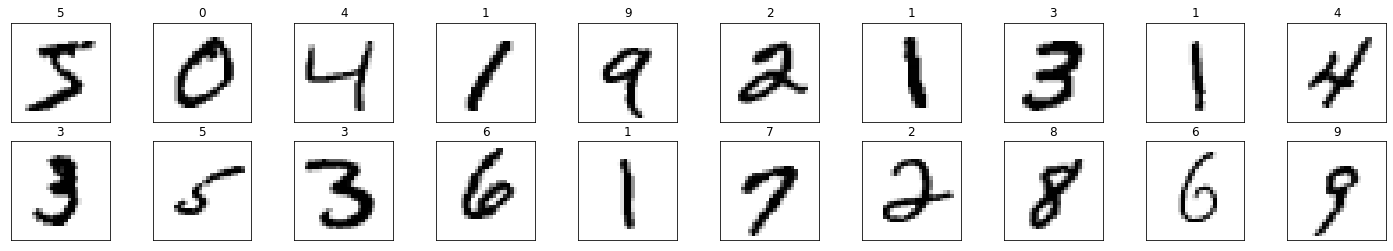

In [9]:
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
   ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
   ax.imshow(xtrain[idx], cmap=plt.cm.binary)
   ax.set_title(str(ytrain[idx]))
   display()

In [11]:
xtrain = xtrain.reshape(60000, 784).astype('float32')/255

In [12]:
ytrain = to_categorical(ytrain, num_classes=10)

In [13]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10,activation='sigmoid',
          input_shape=(784,)))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [14]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10,activation='sigmoid',
          input_shape=(784,)))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", 
                 metrics = ['accuracy'])
model.fit(xtrain, ytrain, epochs=10, verbose=0)

In [18]:
model.compile(loss="categorical_crossentropy", 
              optimizer="sgd", 
              metrics = ['accuracy'])

In [19]:
model.fit(xtrain, ytrain, epochs=10, verbose=0)

In [20]:
_, (x_test_, y_test_)= tf.keras.datasets.mnist.load_data()
x_test = x_test_.reshape(10000, 784).astype('float32')/255
y_test = to_categorical(y_test_, num_classes=10)

In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 801us/step - loss: 0.3356 - accuracy: 0.9072


In [23]:
print("Test accuracy:", test_acc)

Test accuracy: 0.9071999788284302


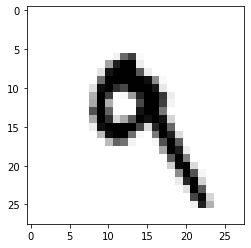

In [33]:
image = 7
_ = plt.imshow(x_test_[image], cmap=plt.cm.binary)
display()

In [34]:
prediction = model.predict(x_test)
print("Model prediction: ", np.argmax(prediction[image]) )

Model prediction:  9


In [35]:
!pip install minio

     |████████████████████████████████| 75 kB 1.5 MB/s  eta 0:00:01


In [39]:
from minio import Minio

minio_client = Minio(
    endpoint="minio:9000",
    access_key="12345678",
    secret_key="password",
    secure=False
)

minio_client.make_bucket("trained-models")

In [44]:
model.save("numbers_model.h5")

In [45]:
minio_client.fput_object(
    bucket_name="trained-models",
    object_name="numbers_model.h5",
    file_path="./numbers_model.h5"
)

'66711170c96cc84eb3995147672cd2dc'